# Dados de vendas de Pulsadores, Interruptores e Tomadas

In [2]:
import pandas as pd
import matplotlib as mpl
import pickle

vendas = pd.read_csv('datasets/serie_historica_2014_2020.csv') # Dados vendas interruptores, tomadas e pulsadores - ADP255.
vendas.head()
vendas.info()
vendas.describe()
vendas.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ano            84 non-null     int64
 1   mes            84 non-null     int64
 2   interruptores  84 non-null     int64
 3   pulsadores     84 non-null     int64
 4   tomadas        84 non-null     int64
 5   total          84 non-null     int64
dtypes: int64(6)
memory usage: 4.1 KB


Index(['ano', 'mes', 'interruptores', 'pulsadores', 'tomadas', 'total'], dtype='object')

In [5]:
# cria a coluna de data no formato Datetime
vendas = vendas.rename(columns={'ano':'year','mes':'month'})
vendas['day'] = 1
vendas['date'] = pd.to_datetime(vendas[['year','month','day']])

# seta a coluna de data como index
vendas = vendas.set_index('date')

vendas # Base de dados para o trabalho.

,year,month,interruptores,pulsadores,tomadas,total,day
date,,,,,,,
2014-01-01,2014,1,5109625,149613,8168659,13427897,1
2014-02-01,2014,2,5235998,141128,8774994,14152120,1
2014-03-01,2014,3,5100680,144853,8465237,13710770,1
2014-04-01,2014,4,4695875,132094,7774926,12602895,1
2014-05-01,2014,5,5563254,156946,8883242,14603442,1
...,...,...,...,...,...,...,...
2020-08-01,2020,8,11713475,210921,22059317,33983713,1
2020-09-01,2020,9,10635364,229234,21341217,32205815,1
2020-10-01,2020,10,11688385,213752,21847140,33749277,1


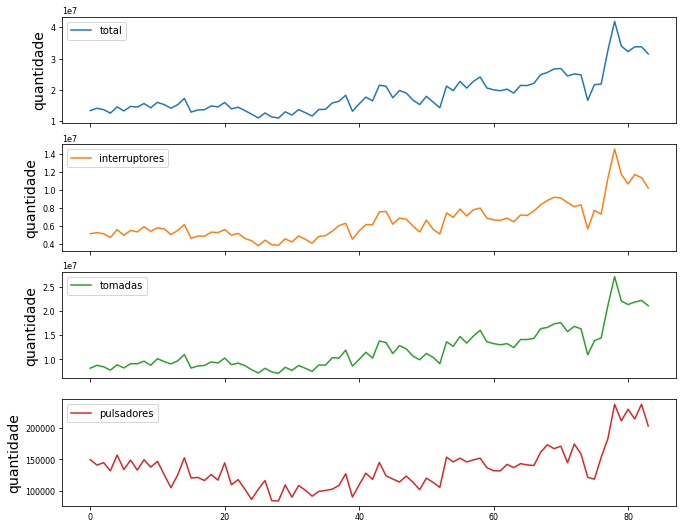

In [5]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
# plota o total de vendas e por tipo de produto
cols_plot = ['total', 'interruptores', 'tomadas', 'pulsadores']
axes = vendas[cols_plot].plot( figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('quantidade')

Salvamos o objeto **vendas** para utilizar no [Passo 2](passo2.ipynb)

In [19]:
file_to_store = open("datasets/vendas.pickle", "wb")
pickle.dump(vendas, file_to_store)
file_to_store.close()